## Анализ рынка категории мусорных пакетов

Описание массива:

- hhkey -- ID покупателя
- occaskey -- ID корзины (один акт покупки)
- movedate -- дата покупки
- value -- полная стоимость товара(-ов)
- number -- число товаров в покупке
- article -- EAN код купленного товара
- brand -- марка товара
- variant -- дополнительное свойство товара
- channel -- канал, в котором была совершена покупка (магазин)

Описание демографических данных:

- hhkey -- ID покупателя
- federatio -- федеральный округ


## Предобработка данных

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Загрузим данные
dem = pd.read_csv('demography_data.csv', sep=';')
dem.head()

,hhkey,federatio
0,71fcc74df3b4f9199bb63118d6009b6a,Moscow
1,9f6251a7d0c6aa44f833f8006119138b,Moscow
2,47187a24bf554aa9fb13041936e6f854,Moscow
3,8a9e0ca7014a60a51a8d19fe6ab6c51d,Moscow
4,6f88bb0863d6fa7b3c4f4e3cadb45144,Moscow


In [8]:
sales = pd.read_csv('purchase_data.tsv', delimiter='\t')
sales.head()

,hhkey,occaskey,movedate,value,number,article,brand,variant,channel
0,71fcc74df3b4f9199bb63118d6009b6a,2b8a403dc4fddd5c4ca208ee38959829,20150116,25.90,1,c5fc127a3b281c8982bcf86349341584,2de1b1dcab5d34f91870faac163d5347,-,DISCOUNTER
1,71fcc74df3b4f9199bb63118d6009b6a,49ffd2642b4ff636e51110a241c26668,20150504,14.80,1,820064fe439acf4789b376894ae90471,a36f123361bcefab91c76ea916f3c543,-,SUPERMARKET
2,9f6251a7d0c6aa44f833f8006119138b,9281ad2fd33fdda835aa86cb4965ea7c,20150626,119.60,4,5b26fa6d175194ad35824f366d9668b3,84b49131d0a5f4efee447c76e488ead6,-,DISCOUNTER
3,47187a24bf554aa9fb13041936e6f854,fe2fcd29a5c8dc40902e8e2929196a91,20150110,50.00,1,4e4a9033092705bf9ad85906ee8c3dec,10a69b4711c975d14eb547d5b30a9085,S ZAVYAZKAMI,Other
4,47187a24bf554aa9fb13041936e6f854,41e5157fa9106ec600f920aa64541862,20150330,59.95,1,f255a760476c9819f3838659e8f0ba13,8037a578948923c78029ba4a3cc2b276,S ZATYAZHKAMI,DISCOUNTER


In [10]:
# Объединим данные двух датасетов 
merged_df = pd.merge(dem, sales, on='hhkey')

In [12]:
merged_df.head()

,hhkey,federatio,occaskey,movedate,value,number,article,brand,variant,channel
0,71fcc74df3b4f9199bb63118d6009b6a,Moscow,2b8a403dc4fddd5c4ca208ee38959829,20150116,25.90,1,c5fc127a3b281c8982bcf86349341584,2de1b1dcab5d34f91870faac163d5347,-,DISCOUNTER
1,71fcc74df3b4f9199bb63118d6009b6a,Moscow,49ffd2642b4ff636e51110a241c26668,20150504,14.80,1,820064fe439acf4789b376894ae90471,a36f123361bcefab91c76ea916f3c543,-,SUPERMARKET
2,9f6251a7d0c6aa44f833f8006119138b,Moscow,9281ad2fd33fdda835aa86cb4965ea7c,20150626,119.60,4,5b26fa6d175194ad35824f366d9668b3,84b49131d0a5f4efee447c76e488ead6,-,DISCOUNTER
3,47187a24bf554aa9fb13041936e6f854,Moscow,fe2fcd29a5c8dc40902e8e2929196a91,20150110,50.00,1,4e4a9033092705bf9ad85906ee8c3dec,10a69b4711c975d14eb547d5b30a9085,S ZAVYAZKAMI,Other
4,47187a24bf554aa9fb13041936e6f854,Moscow,41e5157fa9106ec600f920aa64541862,20150330,59.95,1,f255a760476c9819f3838659e8f0ba13,8037a578948923c78029ba4a3cc2b276,S ZATYAZHKAMI,DISCOUNTER


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12421 entries, 0 to 12420
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hhkey      12421 non-null  object 
 1   federatio  12421 non-null  object 
 2   occaskey   12421 non-null  object 
 3   movedate   12421 non-null  int64  
 4   value      12421 non-null  float64
 5   number     12421 non-null  int64  
 6   article    12421 non-null  object 
 7   brand      12421 non-null  object 
 8   variant    12421 non-null  object 
 9   channel    12421 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 970.5+ KB


In [16]:
merged_df.head()

,hhkey,federatio,occaskey,movedate,value,number,article,brand,variant,channel
0,71fcc74df3b4f9199bb63118d6009b6a,Moscow,2b8a403dc4fddd5c4ca208ee38959829,20150116,25.90,1,c5fc127a3b281c8982bcf86349341584,2de1b1dcab5d34f91870faac163d5347,-,DISCOUNTER
1,71fcc74df3b4f9199bb63118d6009b6a,Moscow,49ffd2642b4ff636e51110a241c26668,20150504,14.80,1,820064fe439acf4789b376894ae90471,a36f123361bcefab91c76ea916f3c543,-,SUPERMARKET
2,9f6251a7d0c6aa44f833f8006119138b,Moscow,9281ad2fd33fdda835aa86cb4965ea7c,20150626,119.60,4,5b26fa6d175194ad35824f366d9668b3,84b49131d0a5f4efee447c76e488ead6,-,DISCOUNTER
3,47187a24bf554aa9fb13041936e6f854,Moscow,fe2fcd29a5c8dc40902e8e2929196a91,20150110,50.00,1,4e4a9033092705bf9ad85906ee8c3dec,10a69b4711c975d14eb547d5b30a9085,S ZAVYAZKAMI,Other
4,47187a24bf554aa9fb13041936e6f854,Moscow,41e5157fa9106ec600f920aa64541862,20150330,59.95,1,f255a760476c9819f3838659e8f0ba13,8037a578948923c78029ba4a3cc2b276,S ZATYAZHKAMI,DISCOUNTER


In [18]:
# Количествово строк в датасете
merged_df.shape

(12421, 10)

In [20]:
# Проверка на наличие пропусков
for row in merged_df.columns:
    print('Кол-во пропусков в столбце ', row, '=', merged_df[row].isnull().sum())

Кол-во пропусков в столбце  hhkey = 0
Кол-во пропусков в столбце  federatio = 0
Кол-во пропусков в столбце  occaskey = 0
Кол-во пропусков в столбце  movedate = 0
Кол-во пропусков в столбце  value = 0
Кол-во пропусков в столбце  number = 0
Кол-во пропусков в столбце  article = 0
Кол-во пропусков в столбце  brand = 0
Кол-во пропусков в столбце  variant = 0
Кол-во пропусков в столбце  channel = 0


In [22]:
merged_df.describe()

,movedate,value,number
count,1.242100e+04,12421.000000,12421.000000
mean,2.014985e+07,50.051868,1.510184
std,2.603076e+03,46.727676,1.172276
min,2.014120e+07,2.300000,1.000000
25%,2.015030e+07,25.000000,1.000000
50%,2.015060e+07,37.720000,1.000000
75%,2.015091e+07,59.050000,2.000000
max,2.015113e+07,1000.000000,20.000000


In [24]:
# Приводим столбец с датой покупки к нужному формату
merged_df['movedate'] = pd.to_datetime(merged_df['movedate'], format='%Y%m%d')

In [26]:
# Смотрим период данных
print('Начало периода: ', merged_df['movedate'].min())
print('Конец периода: ', merged_df['movedate'].max())

Начало периода:  2014-12-01 00:00:00
Конец периода:  2015-11-30 00:00:00


In [28]:
merged_df.head()

,hhkey,federatio,occaskey,movedate,value,number,article,brand,variant,channel
0,71fcc74df3b4f9199bb63118d6009b6a,Moscow,2b8a403dc4fddd5c4ca208ee38959829,2015-01-16,25.90,1,c5fc127a3b281c8982bcf86349341584,2de1b1dcab5d34f91870faac163d5347,-,DISCOUNTER
1,71fcc74df3b4f9199bb63118d6009b6a,Moscow,49ffd2642b4ff636e51110a241c26668,2015-05-04,14.80,1,820064fe439acf4789b376894ae90471,a36f123361bcefab91c76ea916f3c543,-,SUPERMARKET
2,9f6251a7d0c6aa44f833f8006119138b,Moscow,9281ad2fd33fdda835aa86cb4965ea7c,2015-06-26,119.60,4,5b26fa6d175194ad35824f366d9668b3,84b49131d0a5f4efee447c76e488ead6,-,DISCOUNTER
3,47187a24bf554aa9fb13041936e6f854,Moscow,fe2fcd29a5c8dc40902e8e2929196a91,2015-01-10,50.00,1,4e4a9033092705bf9ad85906ee8c3dec,10a69b4711c975d14eb547d5b30a9085,S ZAVYAZKAMI,Other
4,47187a24bf554aa9fb13041936e6f854,Moscow,41e5157fa9106ec600f920aa64541862,2015-03-30,59.95,1,f255a760476c9819f3838659e8f0ba13,8037a578948923c78029ba4a3cc2b276,S ZATYAZHKAMI,DISCOUNTER


In [30]:
# Приводим остальные столбцы к нужному формату
merged_df['hhkey'] = merged_df['hhkey'].astype('string')
merged_df['federatio'] = merged_df['federatio'].astype('string')
merged_df['occaskey'] = merged_df['occaskey'].astype('string')
merged_df['article'] = merged_df['article'].astype('string')
merged_df['brand'] = merged_df['brand'].astype('string')
merged_df['variant'] = merged_df['variant'].astype('string')
merged_df['channel'] = merged_df['channel'].astype('string')

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12421 entries, 0 to 12420
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   hhkey      12421 non-null  string        
 1   federatio  12421 non-null  string        
 2   occaskey   12421 non-null  string        
 3   movedate   12421 non-null  datetime64[ns]
 4   value      12421 non-null  float64       
 5   number     12421 non-null  int64         
 6   article    12421 non-null  string        
 7   brand      12421 non-null  string        
 8   variant    12421 non-null  string        
 9   channel    12421 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(1), string(7)
memory usage: 970.5 KB


In [34]:
merged_df.head()

,hhkey,federatio,occaskey,movedate,value,number,article,brand,variant,channel
0,71fcc74df3b4f9199bb63118d6009b6a,Moscow,2b8a403dc4fddd5c4ca208ee38959829,2015-01-16,25.90,1,c5fc127a3b281c8982bcf86349341584,2de1b1dcab5d34f91870faac163d5347,-,DISCOUNTER
1,71fcc74df3b4f9199bb63118d6009b6a,Moscow,49ffd2642b4ff636e51110a241c26668,2015-05-04,14.80,1,820064fe439acf4789b376894ae90471,a36f123361bcefab91c76ea916f3c543,-,SUPERMARKET
2,9f6251a7d0c6aa44f833f8006119138b,Moscow,9281ad2fd33fdda835aa86cb4965ea7c,2015-06-26,119.60,4,5b26fa6d175194ad35824f366d9668b3,84b49131d0a5f4efee447c76e488ead6,-,DISCOUNTER
3,47187a24bf554aa9fb13041936e6f854,Moscow,fe2fcd29a5c8dc40902e8e2929196a91,2015-01-10,50.00,1,4e4a9033092705bf9ad85906ee8c3dec,10a69b4711c975d14eb547d5b30a9085,S ZAVYAZKAMI,Other
4,47187a24bf554aa9fb13041936e6f854,Moscow,41e5157fa9106ec600f920aa64541862,2015-03-30,59.95,1,f255a760476c9819f3838659e8f0ba13,8037a578948923c78029ba4a3cc2b276,S ZATYAZHKAMI,DISCOUNTER


Также убедимся, что наши данные представлены за весь период и нет каких-либо пробелов. Для этого, сгруппируем количество транзакций (occaskey - ID корзины или одна покупка) по дате, и посмотрим график. 

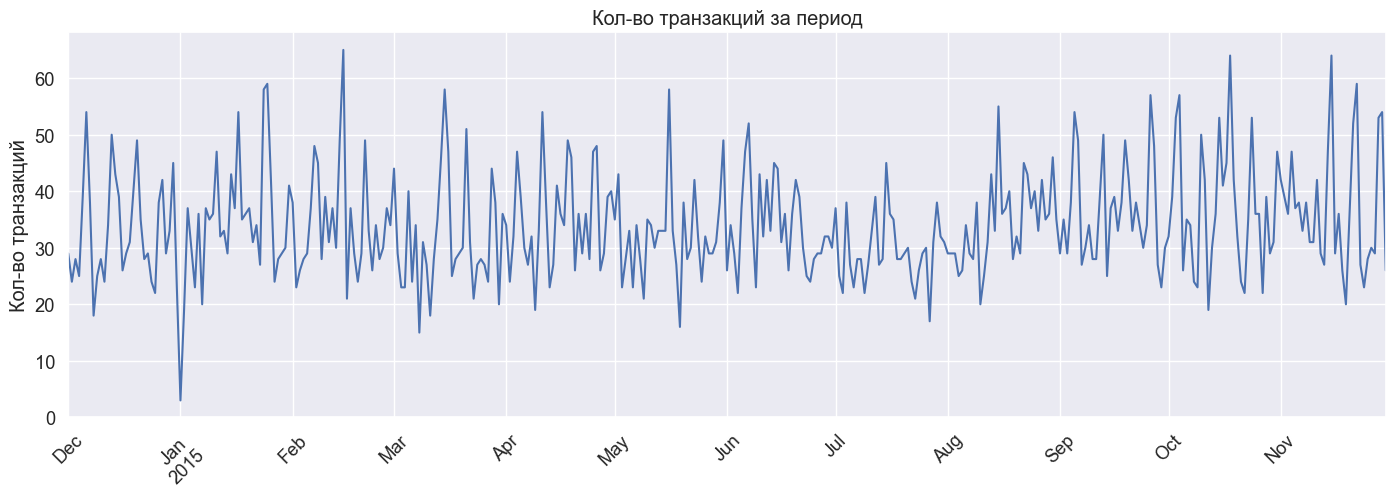

In [37]:
cnt_transaction = merged_df.groupby('movedate')['occaskey'].count().reset_index()

sns.set(font_scale=1.2)
plot = cnt_transaction.plot( x = 'movedate', y = 'occaskey', 
                        grid = True, rot=45, 
                        legend=False, figsize=(17,5))
plt.title('Кол-во транзакций за период')
plt.xlabel('')
plt.ylabel('Кол-во транзакций')
plt.ylim(bottom=0);

Данные представлены за весь указанный период.

**1. Найдем долю повторных покупателей от общего числа покупателей в категории (повторные покупатели - покупатели, совершившие две и более покупки в текущем периоде времени).**

In [41]:
def calculate_repeat_customers(merged_df):
    # Группировка данных по hhkey и подсчет количества покупок
    customer_purchases = merged_df.groupby('hhkey')['occaskey'].count().reset_index()
    
    # Определение повторных покупателей
    repeat_customers = customer_purchases[customer_purchases['occaskey'] > 1]
    
    # Подсчет общего числа покупателей и повторных покупателей
    total_customers = len(customer_purchases)
    repeat_customer_count = len(repeat_customers)
    
    # Расчет доли повторных покупателей
    repeat_percentage = (repeat_customer_count / total_customers) * 100
    
    print(f"Общее количество покупателей: {total_customers}")
    print(f"Количество повторных покупателей: {repeat_customer_count}")
    print(f"Доля повторных покупателей: {repeat_percentage:.2f}%")

# Вызов функции
calculate_repeat_customers(merged_df)


Общее количество покупателей: 4305
Количество повторных покупателей: 2662
Доля повторных покупателей: 61.84%


**2. Разделим повторных покупателей на три группы в зависимости от совокупных затрат в категории: heavy / medium / light buyers. В качестве критерия используем тертили по тратам в категории за весь период среди всех повторных покупателей. Найдем долю каждой группы покупателей от общего числа повторных покупателей.**


In [44]:
# Определяем повторных покупателей
repeat_customers = merged_df[merged_df.hhkey.duplicated(keep=False)]

# Группируем данные по ID покупателя и суммируем затраты
grouped_df = repeat_customers.groupby('hhkey')['value'].sum().reset_index()
grouped_df.columns = ['hhkey', 'total_spent']

# Определяем категории покупателей
q75 = np.percentile(grouped_df['total_spent'], 75)
q25 = np.percentile(grouped_df['total_spent'], 25)

heavy_buyers = grouped_df[grouped_df['total_spent'] >= q75]['hhkey']
medium_buyers = grouped_df[(grouped_df['total_spent'] >= q25) & (grouped_df['total_spent'] < q75)]['hhkey']
light_buyers = grouped_df[grouped_df['total_spent'] < q25]['hhkey']

# Подсчитываем доли каждой группы
all_repeat_customers = len(repeat_customers.hhkey.unique())

heavy_buyer_ratio = len(set(heavy_buyers)) / all_repeat_customers
medium_buyer_ratio = len(set(medium_buyers)) / all_repeat_customers
light_buyer_ratio = len(set(light_buyers)) / all_repeat_customers

print(f"Heavy buyer: {heavy_buyer_ratio:.2%}")
print(f"Medium buyer: {medium_buyer_ratio:.2%}")
print(f"Light buyer: {light_buyer_ratio:.2%}")


Heavy buyer: 25.02%
Medium buyer: 50.04%
Light buyer: 24.94%


In [46]:
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.palettes import Category20c
from bokeh.models.formatters import NumeralTickFormatter 

# Готовим данные для визуализации
categories = ['Heavy Buyers', 'Medium Buyers', 'Light Buyers']
ratios = [heavy_buyer_ratio, medium_buyer_ratio, light_buyer_ratio]

# Создаем выходной файл для визуализации 
output_file("buyers_category_distribution.html")

# Строим диаграмму
p = figure(x_range=categories, title="Доля покупателей по категориям", toolbar_location=None, tools="", height=350)

# Добавляем столбцы
p.vbar(x=categories, top=ratios, width=0.9, color=Category20c[3][:3])

# Форматируем диаграмму
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = "Доля"
p.xaxis.axis_label = "Категория покупателей"
p.xaxis.major_label_orientation = "horizontal"

# Используем NumeralTickFormatter для правильного отображения процентов
p.yaxis.formatter = NumeralTickFormatter(format="0.0%")

# Показать результат
show(p)


**3. Для полученных heavy / medium / light групп найдем средний размер корзины внутри каждого федерального округа (руб / корзина).**



Средний размер корзины для heavy покупателей:
Федеральный округ  Средний размер корзины
          Central               66.493222
         Far East               74.618592
           Moscow               79.545986
       North-West               64.639242
       Privolzhie               71.012911
          Siberia               72.424800
            South               59.867008
    St.Petersburg               76.892994
             Ural               61.389031

Средний размер корзины для medium покупателей:
Федеральный округ  Средний размер корзины
          Central               40.219968
         Far East               44.693935
           Moscow               45.022865
       North-West               41.011689
       Privolzhie               37.632785
          Siberia               44.099119
            South               38.273834
    St.Petersburg               49.450663
             Ural               39.562330

Средний размер корзины для light покупателей:
Федеральный округ 

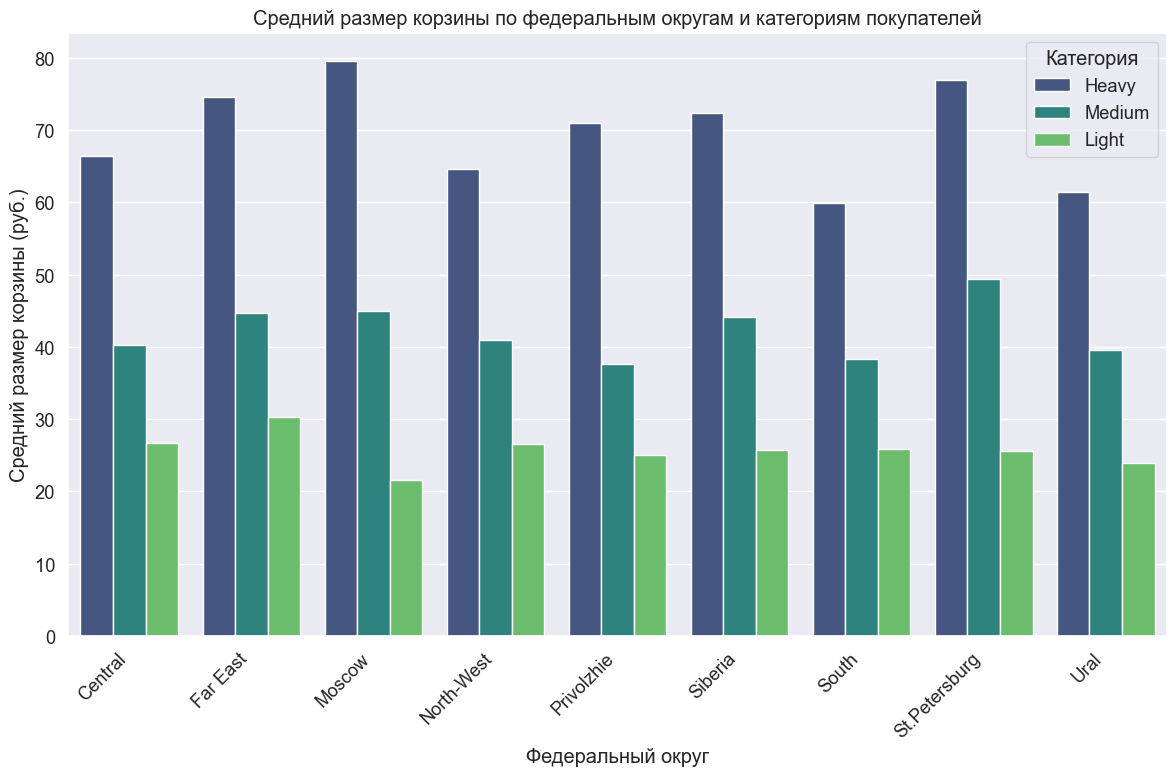


Общий средний размер корзины по всем повторным покупателям:
Федеральный округ  Общий средний размер корзины
          Central                     48.800739
         Far East                     56.854273
           Moscow                     56.260524
       North-West                     49.459820
       Privolzhie                     48.025028
          Siberia                     53.667618
            South                     44.763270
    St.Petersburg                     58.709690
             Ural                     44.850563


In [49]:
# Вычисляем средний размер корзины для каждой группы в каждом федеральном округе
results = {}
for category, buyers in [('heavy', heavy_buyers), ('medium', medium_buyers), ('light', light_buyers)]:
    category_df = repeat_customers[repeat_customers.hhkey.isin(buyers)]
    avg_basket_size = category_df.groupby('federatio')['value'].mean().reset_index()
    avg_basket_size.columns = ['Федеральный округ', 'Средний размер корзины']
    
    print(f"\nСредний размер корзины для {category} покупателей:")
    print(avg_basket_size.to_string(index=False))
    
    # Сохраняем результаты для графика
    avg_basket_size['Категория'] = category.capitalize()
    results[category] = avg_basket_size

# Объединяем результаты всех категорий для графика
plot_data = pd.concat(results.values(), ignore_index=True)

# Создаем график
plt.figure(figsize=(12, 8))
sns.barplot(x='Федеральный округ', y='Средний размер корзины', hue='Категория', data=plot_data, palette='viridis')
plt.title('Средний размер корзины по федеральным округам и категориям покупателей')
plt.xlabel('Федеральный округ')
plt.ylabel('Средний размер корзины (руб.)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Выводим график
plt.show()

# Выводим общую статистику по всем покупателям
overall_avg_basket = repeat_customers.groupby('federatio')['value'].mean().reset_index()
overall_avg_basket.columns = ['Федеральный округ', 'Общий средний размер корзины']

print("\nОбщий средний размер корзины по всем повторным покупателям:")
print(overall_avg_basket.to_string(index=False))

**4. Построим помесячный график трат в категории в целом и по каналам.**


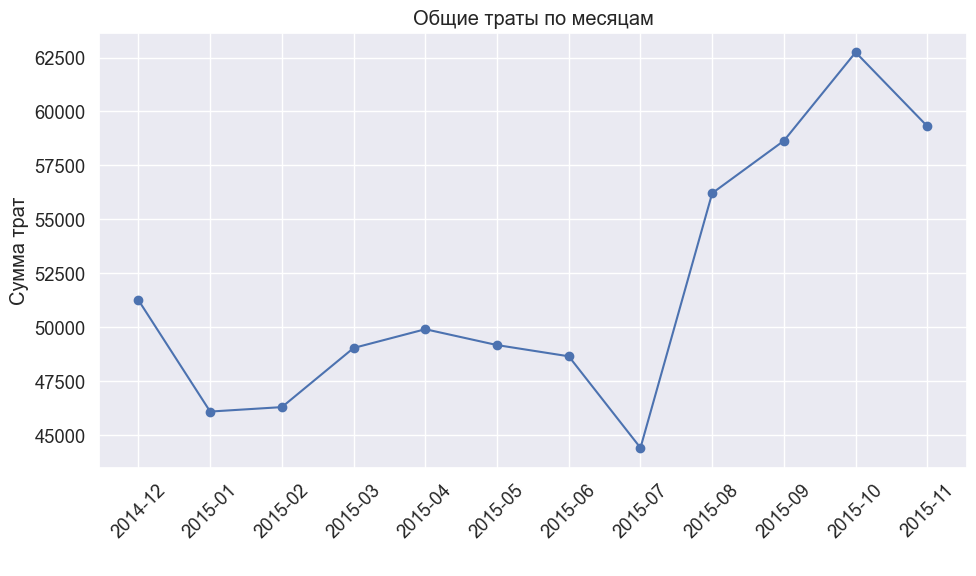

In [52]:
# Создадим столбец для месяца и года
merged_df['year_month'] = merged_df['movedate'].dt.to_period('M')

# Группировка данных по месяцам (year_month) и каналам (channel)
# Суммируем по 'value' для получения общей стоимости
monthly_expenses = merged_df.groupby(['year_month', 'channel']).agg(
    total_value=('value', 'sum'),
    total_number=('number', 'sum')
).reset_index()

# Группировка по месяцам без учета каналов для общей суммы
monthly_expenses_total = merged_df.groupby('year_month').agg(
    total_value=('value', 'sum'),
    total_number=('number', 'sum')
).reset_index()

# График трат по месяцам
plt.figure(figsize=(10, 6))
plt.plot(monthly_expenses_total['year_month'].dt.strftime('%Y-%m'), monthly_expenses_total['total_value'], marker='o')
plt.title('Общие траты по месяцам')
plt.xlabel(' ')
plt.ylabel('Сумма трат')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

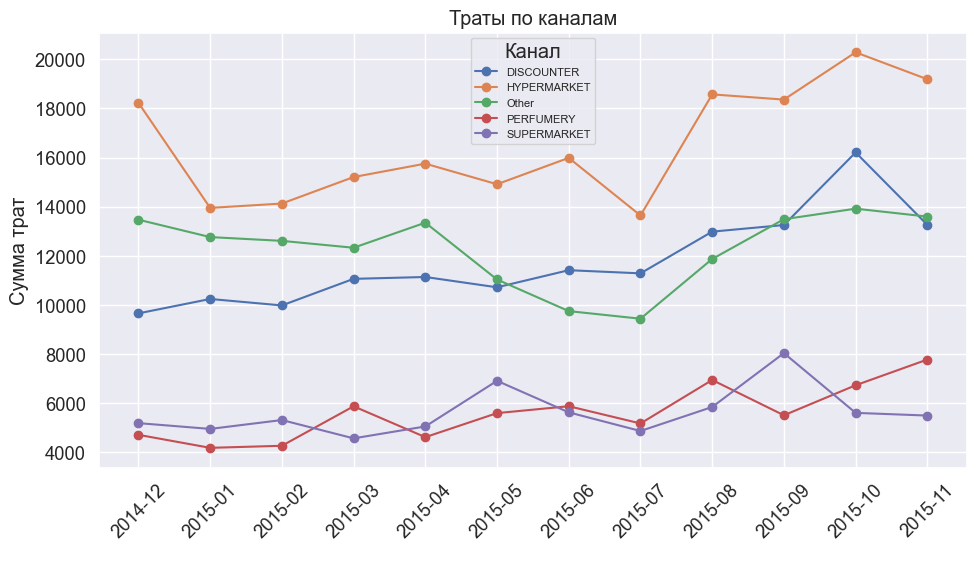

In [54]:
# График трат по каналам
channels = monthly_expenses['channel'].unique()
plt.figure(figsize=(10, 6))

for channel in channels:
    channel_data = monthly_expenses[monthly_expenses['channel'] == channel]
    plt.plot(channel_data['year_month'].dt.strftime('%Y-%m'), channel_data['total_value'], marker='o', label=channel)

plt.title('Траты по каналам')
plt.xlabel(' ')
plt.ylabel('Сумма трат')
plt.xticks(rotation=45)
plt.legend(title='Канал', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

**5. Рассмотрим варианты группировки переменной variant из 5-10 групп. Покажем распределение размера в рублях каждой получившейся группы на рынке.**

In [57]:
# Проверим имеющиеся варианты
unique_variants = merged_df['variant'].unique()
print(unique_variants)

<StringArray>
[                             '-',                   'S ZAVYAZKAMI',
                  'S ZATYAZHKAMI',                       'PROCHNYE',
                  'SUPERPROCHNYE',                   'S ZATYAZHKOY',
                      "S TES'MOY",                 'BIORAZLAGAEMYE',
         'POVYSHENNOY PROCHNOSTI',             "Morskaya svezhest'",
                          'LIMON',                     'UDLINENNYE',
                  'Aromat Limona',                      'UNIVERSAL',
                   'MORSKOY BRIZ',                     'S RUCHKAMI',
                 'OSOBO PROCHNYE',              'AROMATIZIROVANNYE',
                 'POLEVYE TZVETY',              'S AROMATOM LIMONA',
              "ANTIBAKTERIAL'NYE",                        'DACHNYE',
                      'S USHKAMI',                'AROMAT KLUBNIKI',
   "S TES'MOY DLYA ZATYAGIVANIYA", 'AROMATIZIROVANNYE S ZAVYAZKAMI',
                         'EKONOM',         'PROCHNYE S ZATYAZHKAMI',
    'BIORAZLAGAEMYE 

In [59]:
top_10_variants = merged_df['variant'].value_counts().head(10)
print(top_10_variants)

variant
-                         8610
S ZAVYAZKAMI              1809
S ZATYAZHKAMI              457
PROCHNYE                   287
S USHKAMI                  230
S RUCHKAMI                 218
UDLINENNYE                 100
BIORAZLAGAEMYE              91
SUPERPROCHNYE               69
POVYSHENNOY PROCHNOSTI      67
Name: count, dtype: Int64


Вариант " - " встречается очень часто, это может существенно искажать результаты анализа, если мы хотим сосредоточиться на других значениях. Возможно, при продаже этого типа мусорных пакетов не были внесены записи в базу данных, поэтому тип проданного пакета может быть любым из вышеприведенных. В этом случае лучше удалить вариант "-" и выбрать 10 групп пакетов по количеству продаж.

In [62]:
# Удаление строк, где значение в столбце 'variant' равно '-'
merged_df_cleaned = merged_df[merged_df['variant'] != '-']

# Проверка количества уникальных значений после удаления
print(merged_df_cleaned['variant'].value_counts().head(10))

variant
S ZAVYAZKAMI              1809
S ZATYAZHKAMI              457
PROCHNYE                   287
S USHKAMI                  230
S RUCHKAMI                 218
UDLINENNYE                 100
BIORAZLAGAEMYE              91
SUPERPROCHNYE               69
POVYSHENNOY PROCHNOSTI      67
OSOBO PROCHNYE              53
Name: count, dtype: Int64


Названия пакетов трудночитаемые, поэтому переведем их на кириллицу.

In [65]:
# Создаём словарь для замены значений
replacement_dict = {
    '-': 'Не указано',
    'S ZAVYAZKAMI': 'С завязками',
    'S ZATYAZHKAMI': 'С затяжками',
    'PROCHNYE': 'Прочные',
    'SUPERPROCHNYE': 'Суперпрочные',
    'S ZATYAZHKOY': 'С затяжкой',
    "S TES'MOY": 'С тесьмой',
    'BIORAZLAGAEMYE': 'Биораслагаемые',
    'POVYSHENNOY PROCHNOSTI': 'Повышенной прочности',
    "Morskaya svezhest'": 'Морская свежесть',
    'LIMON': 'Лимон',
    'UDLINENNYE': 'Удлинённые',
    'Aromat Limona': 'Аромат лимона',
    'UNIVERSAL': 'Универсальные',
    'MORSKOY BRIZ': 'Морской бриз',
    'S RUCHKAMI': 'С ручками',
    'OSOBO PROCHNYE': 'Особо прочные',
    'AROMATIZIROVANNYE': 'Ароматизированные',
    'POLEVYE TZVETY': 'Полевые цветы',
    'S AROMATOM LIMONA': 'С ароматом лимона',
    "ANTIBAKTERIAL'NYE": 'Антибактериальные',
    'DACHNYE': 'Дачные',
    'S USHKAMI': 'С ушками',
    'AROMAT KLUBNIKI': 'Аромат клубники',
    "S TES'MOY DLYA ZATYAGIVANIYA": 'С тесьмой для затягивания',
    'AROMATIZIROVANNYE S ZAVYAZKAMI': 'Ароматизированные с завязками',
    'EKONOM': 'Эконом',
    'PROCHNYE S ZATYAZHKAMI': 'Прочные с затяжками',
    'BIORAZLAGAEMYE S ZAVYAZKAMI': 'Биораслагаемые с завязками',
    'MULTITOP LUX': 'Мультитоп Люкс',
    'MAGNUM': 'Магнум',
    'OSOBOPROCHNYE': 'Особопрочные',
    'BIO S ZAVYAZKAMI': 'Био с завязками',
    'POWER': 'Пауэр',
    'TSITRUS': 'Цитрус',
    'S LEPESTKAMI': 'С лепестками',
    'LESNYE TRAVY': 'Лесные травы',
    'POMOSHNIK': 'Помощник',
    'S ZAVYAZKAMI D/STROIT.MUSORA': 'С завязками для строительства мусора',
    'MAYKA': 'Майка',
    "VANIL'": 'Ваниль',
    "U MASHEN'KI": 'У Машеньки',
    "UL'TRAPROCHNYE": 'Ультрапрочные',
    'LYUKS S ZAVYAZKAMI': 'Люкс с завязками',
    'DVUKHSLOYNYE': 'Двухслойные',
    'MESHOK-MAYKA': 'Мешок-майка',
    "AROMAT APEL'SINA S ZATYAZHKAMI": 'Аромат апельсина с затяжками',
    'STANDART': 'Стандарт',
    'AROMAT LAVANDY': 'Аромат лаванды',
    'TSITRUSOVIY MIKS': 'Цитрусовый микс',
    'OSOBO PROCHNYE S ZAVYAZKAMI': 'Особо прочные с завязками',
    'ZAPAKH LIMONA': 'Запах лимона',
    "MAX PROCHNOST'": 'Макс прочность',
    'ZAPAKH LAVANDY': 'Запах лаванды',
    'TSVETOCHIY AROMAT': 'Цветочный аромат',
    'AROMAT MYATY': 'Аромат мяты',
    'S AROMATOM KLUBNIKI': 'С ароматом клубники',
    'AROMAT VANILI': 'Аромат ванили',
    'PROFI': 'Профи',
    'AROMAT YABLOKA': 'Аромат яблока',
    'S LENTOY': 'С лентой'
}

# Переименовываем значения в столбце 'variant'
merged_df_cleaned['variant'] = merged_df_cleaned['variant'].replace(replacement_dict)

# Проверим результат
print(merged_df_cleaned['variant'].unique())


<StringArray>
[                         'С завязками',
                          'С затяжками',
                              'Прочные',
                         'Суперпрочные',
                           'С затяжкой',
                            'С тесьмой',
                       'Биораслагаемые',
                 'Повышенной прочности',
                     'Морская свежесть',
                                'Лимон',
                           'Удлинённые',
                        'Аромат лимона',
                        'Универсальные',
                         'Морской бриз',
                            'С ручками',
                        'Особо прочные',
                    'Ароматизированные',
                        'Полевые цветы',
                    'С ароматом лимона',
                    'Антибактериальные',
                               'Дачные',
                             'С ушками',
                      'Аромат клубники',
            'С тесьмой для затягивания',
  

C:\Users\alexa\AppData\Local\Temp\ipykernel_22928\4176624421.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['variant'] = merged_df_cleaned['variant'].replace(replacement_dict)


In [67]:
# Топ 10 вариантов пакетов
top_10_variants = merged_df_cleaned['variant'].value_counts().head(10)
print(top_10_variants)

variant
С завязками             1809
С затяжками              457
Прочные                  287
С ушками                 230
С ручками                218
Удлинённые               100
Биораслагаемые            91
Суперпрочные              69
Повышенной прочности      67
Особо прочные             53
Name: count, dtype: Int64


In [69]:
# Группируем по столбцу 'variant' и суммируем значения в столбце 'size_in_rubles'
variant_size_distribution = merged_df_cleaned.groupby('variant')['value'].sum().sort_values(ascending=False).head(10)

# Выводим топ-10 групп по размеру в рублях
print(variant_size_distribution)

variant
С завязками             120642.424
С затяжками              31568.920
С ручками                13418.460
Прочные                  13059.450
С ушками                 12522.920
Суперпрочные              9525.000
Удлинённые                4109.890
Повышенной прочности      3942.970
Биораслагаемые            3718.990
Особо прочные             3569.290
Name: value, dtype: float64


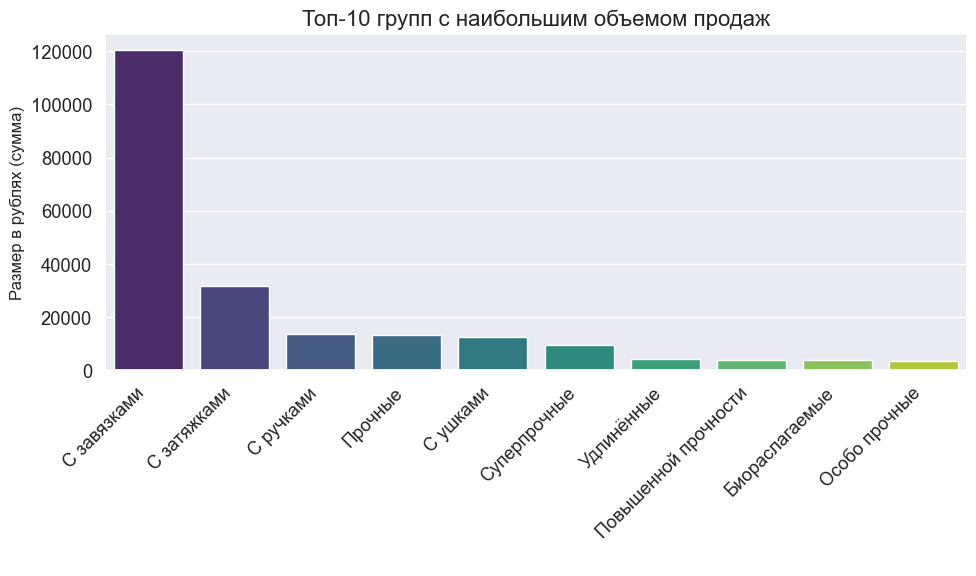

In [71]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=variant_size_distribution.index, y=variant_size_distribution.values, palette='viridis')

    # Добавляем подписи и заголовок
    plt.title('Топ-10 групп с наибольшим объемом продаж', fontsize=16)
    plt.xlabel(' ')
    plt.ylabel('Размер в рублях (сумма)', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X для удобства

    # Показываем график
    plt.tight_layout()
    plt.show()